# Balance equations 
In engineering, there are 4 common balance equations from conservation principles including mass, momentum, energy, and species. General forms of each equation are shown below with the accumulation term on the left and inlet (in), outlet (out), generation (gen), and consumption (cons) terms on the right side of the equation.

$$Accumulation=In−Out+Generation−Consumption$$

### Mass Balance

$$\frac{dm}{dt} = \frac{d(ρV)}{dt} = ∑\dot{m}_{in} − ∑\dot{m}_{out}$$

### Species Balance
A species balance tracks the number of moles $n$ of species $A$ in a control volume. The accumulation of $A$, $\frac{d(nA)}{dt}$, in a control volume is calculated by inlet, outlet, reaction generation, and reaction consumption rates.

$$\frac{dn_{A}}{dt}=∑\dot{n}_{A_{in}}−∑\dot{n}_{A_{out}}+∑\dot{n}_{A_{gen}}−∑\dot{n}_{A_{cons}}$$

The molar amount, $n_{A}$ is often measured as a concentration, $c_{A}$ and reaction rates are often expressed in terms of a specific reaction rate, $r_{A}$, as a molar rate of generation per volume.

$$\frac{dc_{A}V}{dt} = ∑c_{A_{in}}\dot{V}_{in} − ∑c_{A_{out}}\dot{V}_{out}+r_{A}V$$

### Momentum Balance
A momentum balance is the accumulation of momentum for a control volume equal to the sum of forces $F$ acting on that control volume.

$$\frac{d(mv)}{dt} = ∑F$$

with $m$ as the mass in the control volume and $v$ as the velocity of the control volume.

### Energy Balance

$$\frac{dE}{dt} = \frac{d(U+K+P)}{dt}=∑\dot{m}_{in}(\hat{h}_{in} + \frac{v^{2}_{in}}{2g_{c}} + \frac{z_{in}g_{in}}{g_{c}})−∑\dot{m}_{out}(\hat{h}_{out} + \frac{v^{2}_{out}}{2g_{c}} + \frac{z_{out}g_{out}}{g_{c}}) + Q + W_{s}$$

Kinetic (K) and potential (P) energy terms are omitted because the internal energy (due to temperature) is typically a much larger contribution than any elevation (z) or velocity (v) changes of a fluid for most chemical processes.

$$\frac{dh}{dt}=∑\dot{m}_{in}\hat{h}_{in} − ∑\dot{m}_{out}\hat{h}_{out} + Q + W_{s}$$

The enthalpy, $h$, is related to temperature as $mc_{p}(T-T_{ref})$ where $c_{p}$ is the heat capacity. With a constant reference temperature $(T_{ref})$, this reduces to the following.

$$mc_{p}\frac{dT}{dt}=∑\dot{m}_{in}c_{p}(T_{in}−T_{ref})−∑\dot{m}_{out}c_{p}(T_{out}−T_{ref})+Q+W_{s}$$

### Exercise

Use a mass, species, and energy balance to describe the dynamic response in volume, concentration, and temperature of a well-mixed vessel. 

<img src="pictures/balance_eqn_diagram.png" width="500">

The inlet $(q_{f})$ and outlet $(q)$ volumetric flowrates, feed concentration $(C_{a_{f}})$, and inlet temperature $(T_{f})$ can be adjusted. Initial conditions for the vessel are $V= 1.0 L$, $C_{a} = 0.0$ mol/L, and $T=350 K$. There is no reaction and no significant heat added by the mixer. There is a cooling jacket that can be used to adjust the outlet temperature. Show step changes in the process inputs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Define mixing model
def vessel(x,t,q,qf,Caf,Tf):
    # Inputs (4):
    # qf  = Inlet Volumetric Flowrate (L/min)
    # q   = Outlet Volumetric Flowrate (L/min)
    # Caf = Feed Concentration (mol/L)
    # Tf  = Feed Temperature (K)

    # States (3):
    # Volume (L)
    V = x[0]
    # Concentration of A (mol/L)
    Ca = x[1]
    # Temperature (K)
    T = x[2]

    # Parameters:
    # Reaction
    rA = 0.0

    # Mass balance: volume derivative
    dVdt = qf - q

    # Species balance: concentration derivative
    # Chain rule: d(V*Ca)/dt = Ca * dV/dt + V * dCa/dt
    dCadt = (qf*Caf - q*Ca)/V - rA - (Ca*dVdt/V)

    # Energy balance: temperature derivative
    # Chain rule: d(V*T)/dt = T * dV/dt + V * dT/dt
    dTdt = (qf*Tf - q*T)/V - (T*dVdt/V)

    # Return derivatives
    return [dVdt,dCadt,dTdt]

In [3]:
# Initial Conditions for the States
V0 = 1.0
Ca0 = 0.0
T0 = 350.0
y0 = [V0,Ca0,T0]

In [4]:
# Time Interval (min)
t = np.linspace(0,10,100)

In [5]:
# Inlet Volumetric Flowrate (L/min)
qf = np.ones(len(t))* 5.2
qf[50:] = 5.1

In [6]:
# Outlet Volumetric Flowrate (L/min)
q = np.ones(len(t))*5.0

In [7]:
# Feed Concentration (mol/L)
Caf = np.ones(len(t))*1.0
Caf[30:] = 0.5

In [8]:
# Feed Temperature (K)
Tf = np.ones(len(t))*300.0
Tf[70:] = 325.0

In [9]:
# Storage for results
V  = np.ones(len(t))*V0
Ca = np.ones(len(t))*Ca0
T  = np.ones(len(t))*T0

In [10]:
# Loop through each time step
for i in range(len(t)-1):
    # Simulate
    inputs = (q[i],qf[i],Caf[i],Tf[i])
    ts = [t[i],t[i+1]]
    y = odeint(vessel,y0,ts,args=inputs)
    # Store results
    V[i+1]  = y[-1][0]
    Ca[i+1] = y[-1][1]
    T[i+1]  = y[-1][2]
    # Adjust initial condition for next loop
    y0 = y[-1]

In [11]:
# Construct results and save data file
data = np.vstack((t,qf,q,Tf,Caf,V,Ca,T)) # vertical stack
data = data.T             # transpose data
np.savetxt('data.txt',data,delimiter=',')

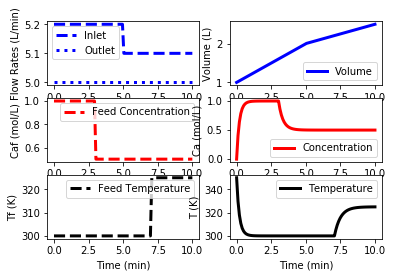

In [12]:
# Plot the inputs and results
plt.figure()

plt.subplot(3,2,1)
plt.plot(t,qf,'b--',linewidth=3)
plt.plot(t,q,'b:',linewidth=3)
plt.ylabel('Flow Rates (L/min)')
plt.legend(['Inlet','Outlet'],loc='best')

plt.subplot(3,2,3)
plt.plot(t,Caf,'r--',linewidth=3)
plt.ylabel('Caf (mol/L)')
plt.legend(['Feed Concentration'],loc='best')

plt.subplot(3,2,5)
plt.plot(t,Tf,'k--',linewidth=3)
plt.ylabel('Tf (K)')
plt.legend(['Feed Temperature'],loc='best')
plt.xlabel('Time (min)')

plt.subplot(3,2,2)
plt.plot(t,V,'b-',linewidth=3)
plt.ylabel('Volume (L)')
plt.legend(['Volume'],loc='best')

plt.subplot(3,2,4)
plt.plot(t,Ca,'r-',linewidth=3)
plt.ylabel('Ca (mol/L)')
plt.legend(['Concentration'],loc='best')

plt.subplot(3,2,6)
plt.plot(t,T,'k-',linewidth=3)
plt.ylabel('T (K)')
plt.legend(['Temperature'],loc='best')
plt.xlabel('Time (min)')

plt.show()